In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# Load the data
df = pd.read_csv('./data/marketing_AB.csv')

# Data cleaning
df = df.drop(["Unnamed: 0"], axis=1)  

# Clean column names by removing leading/trailing spaces and replacing spaces with underscores
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

# Create a new column 'converted_int' to represent conversions as 1 (True) or 0 (False)
df["converted_int"] = df['converted'].apply(lambda x: 1 if x else 0)

# Print information about the DataFrame
print(f'Rows: {df.shape[0]}')             # Number of rows
print(f'Columns: {df.shape[1]}')          # Number of columns
print(f'Missing Values: {df.isnull().values.sum()}') # Total count of missing values
print(f'Unique Values: \n{df.nunique()}')  # Count of unique values in each column

Rows: 588101
Columns: 7
Missing Values: 0
Unique Values: 
user_id          588101
test_group            2
converted             2
total_ads           807
most_ads_day          7
most_ads_hour        24
converted_int         2
dtype: int64


In [8]:
print(df.describe())

# Overall conversion rate
print(f"Overall conversion rate: {df['converted'].mean():.2%}")

# Conversion rate by group
conversion_rates = df.groupby('test_group')['converted'].mean()
print("\nConversion rates by group:")
print(conversion_rates)

            user_id      total_ads  most_ads_hour  converted_int
count  5.881010e+05  588101.000000  588101.000000  588101.000000
mean   1.310692e+06      24.820876      14.469061       0.025239
std    2.022260e+05      43.715181       4.834634       0.156850
min    9.000000e+05       1.000000       0.000000       0.000000
25%    1.143190e+06       4.000000      11.000000       0.000000
50%    1.313725e+06      13.000000      14.000000       0.000000
75%    1.484088e+06      27.000000      18.000000       0.000000
max    1.654483e+06    2065.000000      23.000000       1.000000
Overall conversion rate: 2.52%

Conversion rates by group:
test_group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [9]:
ad_group = df[df['test_group'] == 'ad']['converted_int']
psa_group = df[df['test_group'] == 'psa']['converted_int']

t_statistic, p_value = stats.ttest_ind(ad_group, psa_group)
print("Student's t-test:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")


Student's t-test:
t-statistic: 7.3704
p-value: 0.0000


In [10]:
contingency_table = pd.crosstab(df['test_group'], df['converted'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-squared test:")
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")



Chi-squared test:
Chi-squared statistic: 54.0058
p-value: 0.0000


In [11]:
diff_abs = conversion_rates['ad'] - conversion_rates['psa']
diff_rel = (conversion_rates['ad'] - conversion_rates['psa']) / conversion_rates['psa']

print(f"Absolute difference in conversion rates: {diff_abs:.2%}")
print(f"Relative difference in conversion rates: {diff_rel:.2%}")


Absolute difference in conversion rates: 0.77%
Relative difference in conversion rates: 43.09%


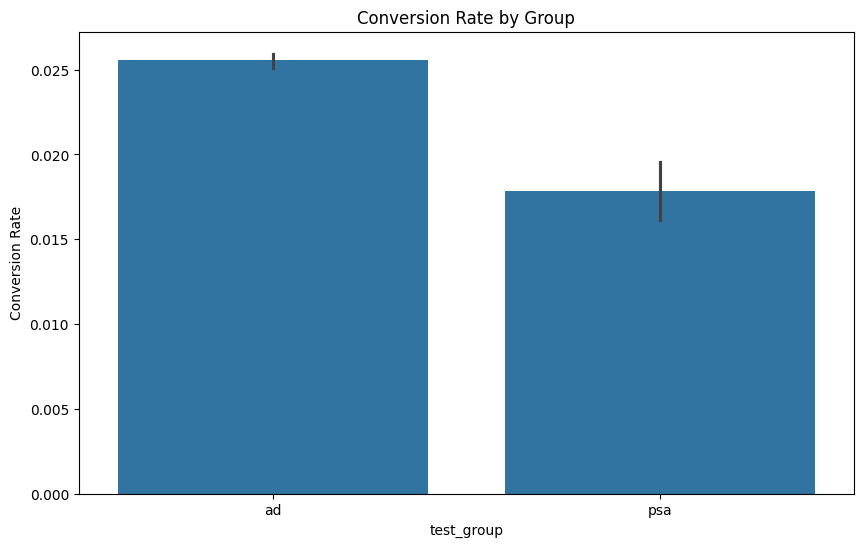

/home/gael/miniconda3/envs/pandas/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/gael/miniconda3/envs/pandas/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


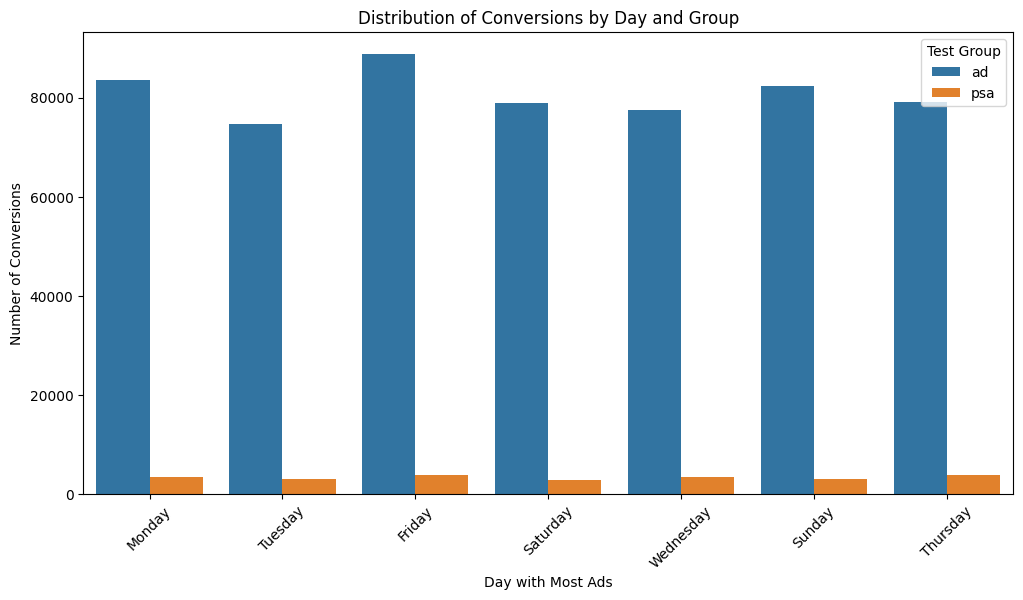

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='test_group', y='converted', data=df)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.savefig('./img/04_14.png')
plt.show()

# Distribution of conversions by day and group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='most_ads_day', hue='test_group')
plt.title('Distribution of Conversions by Day and Group')
plt.xlabel('Day with Most Ads')
plt.ylabel('Number of Conversions')
plt.xticks(rotation=45)
plt.legend(title='Test Group')
plt.savefig('./img/04_15.png')
plt.show()